In [285]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
# To enable plotting graphs in Jupyter notebook

In [286]:
bc_df = pd.read_csv("wisc_bc_data.csv")

In [287]:
bc_df.shape

(569, 32)

In [288]:
bc_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

In [289]:
bc_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [290]:
bc_df.dtypes

id                     int64
diagnosis             object
radius_mean          float64
texture_mean         float64
perimeter_mean       float64
area_mean            float64
smoothness_mean      float64
compactness_mean     float64
concavity_mean       float64
points_mean          float64
symmetry_mean        float64
dimension_mean       float64
radius_se            float64
texture_se           float64
perimeter_se         float64
area_se              float64
smoothness_se        float64
compactness_se       float64
concavity_se         float64
points_se            float64
symmetry_se          float64
dimension_se         float64
radius_worst         float64
texture_worst        float64
perimeter_worst      float64
area_worst           float64
smoothness_worst     float64
compactness_worst    float64
concavity_worst      float64
points_worst         float64
symmetry_worst       float64
dimension_worst      float64
dtype: object

In [291]:
bc_df['diagnosis'] = bc_df.diagnosis.astype('category')
bc_df.dtypes

id                      int64
diagnosis            category
radius_mean           float64
texture_mean          float64
perimeter_mean        float64
area_mean             float64
smoothness_mean       float64
compactness_mean      float64
concavity_mean        float64
points_mean           float64
symmetry_mean         float64
dimension_mean        float64
radius_se             float64
texture_se            float64
perimeter_se          float64
area_se               float64
smoothness_se         float64
compactness_se        float64
concavity_se          float64
points_se             float64
symmetry_se           float64
dimension_se          float64
radius_worst          float64
texture_worst         float64
perimeter_worst       float64
area_worst            float64
smoothness_worst      float64
compactness_worst     float64
concavity_worst       float64
points_worst          float64
symmetry_worst        float64
dimension_worst       float64
dtype: object

In [292]:
bc_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [293]:
bc_df["diagnosis"].value_counts()

# Class distribution among B and M is almost 2:1. The model will better predict B and M

B    357
M    212
Name: diagnosis, dtype: int64

In [294]:
bc_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


drop the first column from the data frame. This is Id column which is not used in modeling

In [295]:
# The first column is id column which is patient id and nothing to do with the model attriibutes. So drop it.

bc_df = bc_df.drop(labels = "id", axis = 1)
# bc_df.drop(labels = "id", axis = 1, inplace = True)

In [296]:
bc_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [297]:
bc_df.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [298]:
# Create a separate dataframe consisting only of the features i.e independent attributes
bc_feature_df = bc_df.drop(labels= "diagnosis" , axis = 1)

In [299]:
bc_feature_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [300]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

bc_feature_df_z = bc_feature_df.apply(zscore)  # convert all attributes to Z scale 

In [301]:
Y=bc_df["diagnosis"]

In [302]:
X=bc_feature_df_z

In [303]:
type(X)

pandas.core.frame.DataFrame

In [304]:
type(Y)

pandas.core.series.Series

In [305]:
X.shape

(569, 30)

In [306]:
Y.shape

(569,)

In [307]:
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X,Y,test_size=0.3,random_state=2)

In [308]:
X_Train.shape

(398, 30)

In [309]:
X_Test.shape

(171, 30)

In [310]:
len(Y_Train)

398

In [311]:
NNH = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform',metric='euclidean')

# weights :  optional (default = ‘uniform’)
#weight function used in prediction. Possible values:
#‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
#‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

# distance measures can be P=1 manhattan, P=2 Euclidian , anyother p value will map to minkowskian

In [312]:
# Call Nearest Neighbour algorithm
NNH.fit(X_Train, Y_Train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=21, p=2,
           weights='uniform')

In [313]:
# For every test data point, predict it's label based on k nearest neighbours in this model. The majority class will 
# be assigned to the test data point

y_pred = NNH.predict(X_Test)

In [314]:
y_pred

array(['B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

In [315]:
# get the accuracy score which is how many test cases were correctly predicted as a ratio of total number of test cases

acc = metrics.accuracy_score(Y_Test,y_pred)
print(acc)

0.9415204678362573


In [316]:
cm=metrics.confusion_matrix(Y_Test,y_pred)
print(cm)

[[98  2]
 [ 8 63]]


In [317]:
cr=metrics.classification_report(Y_Test,y_pred)
print(cr)

             precision    recall  f1-score   support

          B       0.92      0.98      0.95       100
          M       0.97      0.89      0.93        71

avg / total       0.94      0.94      0.94       171



# To drop the high correlated data from the dataset

In [318]:
# To improve performance ------------------------- Iteration 2 -----------------------------------


In [319]:
# Let us analyze the different attributes for distribution and the correlation by using scatter matrix



In [320]:
# As is evident from the scatter matrix, many dimensions have strong correlation and that is not surprising
# Area and Perimeter are function of radius, so they will have strong correlation. Why take multiple dimensions 
# when they convey the same information to the model?

In [321]:
# To to drop dependent columns from bc_df

bc_features_pruned_df_z =  bc_feature_df_z.drop(['perimeter_mean', 'area_mean'], axis=1)

In [322]:
X = np.array(bc_features_pruned_df_z)

In [323]:
# Break the data into training and test set

X_Train = X[:398,:]

In [324]:
X_Test = X[398:,:]

In [325]:
X_Test.shape

(171, 28)

In [326]:
# Call Nearest Neighbour algorithm

NNH.fit(X_Train, Y_Train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=21, p=2,
           weights='uniform')

In [327]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(X_Test)

In [328]:
# get the accuracy score which is how many test cases were correctly predicted as a ratio of total number of test cases

acc2 = metrics.accuracy_score(Y_Test, predicted_labels)
print(acc2)

0.5789473684210527


In [329]:
cm=metrics.confusion_matrix(Y_Test,predicted_labels)
print(cm)

[[94  6]
 [66  5]]


In [330]:
cr=metrics.classification_report(Y_Test,predicted_labels)
print(cr)

             precision    recall  f1-score   support

          B       0.59      0.94      0.72       100
          M       0.45      0.07      0.12        71

avg / total       0.53      0.58      0.47       171



In [331]:
from sklearn.preprocessing import StandardScaler

# Feature extraction by PCA

In [332]:
X = bc_df.drop('diagnosis',axis=1)
Y = bc_df['diagnosis']
X_std = StandardScaler().fit_transform(X)
#(X-np.mean(X,axis=0))/np.std(X,axis=0)

In [333]:
X_std.shape

(569, 30)

In [334]:
cov_matrix  = np.cov(X_std,rowvar=False) 

In [335]:
eigenvalues,eigenvector = np.linalg.eig(cov_matrix)

In [336]:
eig_pairs = [(eigenvalues[index],eigenvector[:,index]) for index in range(len(eigenvalues))]

In [337]:
eigenvalues_sort = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigenvector_sort = [eig_pairs[index][1] for index in range(len(eigenvector))]

In [338]:
tot = sum(eigenvalues)
var_explained = [(i/tot) for i in sorted(eigenvalues,reverse=True)]
cum_var_exp = np.cumsum(var_explained)

In [339]:
cum_var_exp

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

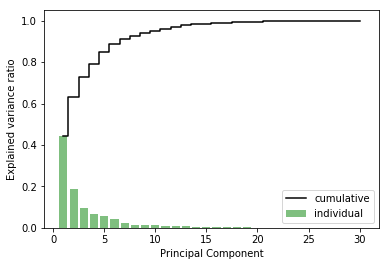

In [340]:
plt.bar(range(1,31),var_explained,alpha=0.5,align = 'center',label  = 'individual',color = 'g')
plt.step(range(1,31),cum_var_exp,where = 'mid',label  = 'cumulative',color = 'k')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal Component')
plt.legend(loc='best')
plt.show()

In [341]:
P_reduce = np.array(eigenvector_sort[0:12]).transpose()

In [342]:
Proj_data_2D = np.dot(X_std,P_reduce)
Proj_data_2D.shape

(569, 12)

In [343]:
X_std.shape,P_reduce.shape,Proj_data_2D.shape

((569, 30), (30, 12), (569, 12))

In [344]:
X_train, X_test, y_train, y_test = train_test_split(Proj_data_2D, Y, test_size=0.3, random_state=7)

In [345]:
NNH = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform',metric='euclidean')

In [346]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=21, p=2,
           weights='uniform')

In [347]:
y_pred = NNH.predict(X_test)

In [348]:
acc2 = metrics.accuracy_score(y_test, y_pred)
print(acc2)

0.9473684210526315


In [349]:
cm=metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[107   2]
 [  7  55]]


# Using KMEANS to check which Model helps to predict the diagnosis better

In [350]:
bc_feature_df_z = bc_feature_df.apply(zscore)

In [351]:
bc_feature_df_z.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,-0.513297,-1.605595,-0.540376,-0.542624,0.458285,-0.654413,-0.614306,-0.307442,0.538081,-0.460382,...,-0.573451,-1.634499,-0.604391,-0.582718,0.268776,-0.812128,-0.709978,-0.315133,-0.119321,-0.899721
1,-1.001801,-0.079038,-0.934566,-0.877375,0.036986,0.196319,-0.312987,-0.580343,0.402996,0.299453,...,-0.908925,-0.445740,-0.863230,-0.801227,-0.485202,-0.017590,-0.386625,-0.538203,0.063489,-0.447528
2,-0.876835,-0.572377,-0.867014,-0.801153,0.806996,-0.498443,-0.732448,-0.622129,-0.356400,0.085395,...,-0.799171,0.124213,-0.814083,-0.719308,0.198638,-0.674722,-0.793935,-0.613574,0.157320,-0.284606
3,-0.808671,-1.372888,-0.781338,-0.768161,1.426135,0.175472,-0.532950,-0.024740,-0.148296,-0.294523,...,-0.900641,-1.613330,-0.915355,-0.785054,0.189871,-0.458434,-0.889933,-0.433901,-1.292212,-0.892517
4,0.301824,-1.414775,0.234000,0.161860,-1.190618,-0.663320,-0.688883,-0.576473,-0.330843,-1.043018,...,-0.014328,-1.619844,-0.082245,-0.108082,-0.866574,-0.512506,-0.652408,-0.499832,-0.669366,-0.902492


In [352]:
cluster_range = range(1,15)
cluster_error = []
for num_cluster in cluster_range:
    clusters = KMeans(num_cluster,n_init=10)
    clusters.fit(bc_feature_df_z)
    labels = clusters.labels_
    centroid = clusters.cluster_centers_
    cluster_error.append(clusters.inertia_)
cluster_df  = pd.DataFrame({"Num_cluster":cluster_range,"cluster_error":cluster_error})
cluster_df

,Num_cluster,cluster_error
0,1,17070.000000
1,2,11595.526607
2,3,10061.797818
3,4,9256.988836
4,5,8554.955918
5,6,7965.996872
6,7,7539.614173
7,8,7206.870214
8,9,7006.419979
9,10,6642.301079


In [353]:
for i in range(0,len(cluster_df.cluster_error)-1):
    t=cluster_df['cluster_error'][i]-cluster_df['cluster_error'][i+1]
    print(t)

5474.473392884214
1533.7287888720894
804.8089818793542
702.0329180399731
588.9590465392366
426.38269911876705
332.7439585080783
200.45023527229296
364.11889940660785
250.23082785687984
163.44986178979343
171.8158642526896
183.7293312597476


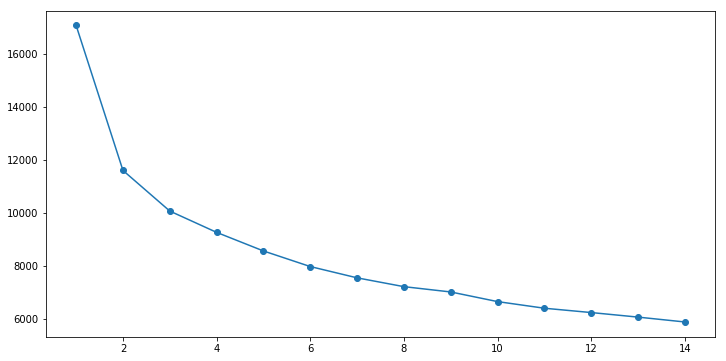

In [354]:
plt.figure(figsize=(12,6))
plt.plot(cluster_df.Num_cluster,cluster_df.cluster_error,marker = 'o')

In [355]:
model = KMeans(n_clusters=2)
model.fit(bc_feature_df_z)  

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [356]:
centroid = model.cluster_centers_

In [357]:
centroid

array([[-0.48442497, -0.23948977, -0.50066826, -0.47922799, -0.30302374,
        -0.50766196, -0.56671617, -0.57922637, -0.30396101, -0.12545115,
        -0.4270387 , -0.02125791, -0.42787555, -0.40142988, -0.00848542,
        -0.34569618, -0.31677152, -0.38607654, -0.06982168, -0.20642387,
        -0.51730476, -0.25182285, -0.53018015, -0.49893721, -0.3025456 ,
        -0.47291642, -0.51940106, -0.57008917, -0.29713594, -0.30959659],
       [ 0.97397614,  0.48151381,  1.0066346 ,  0.96352718,  0.60925407,
         1.020696  ,  1.13942935,  1.16458212,  0.61113855,  0.25222982,
         0.85859633,  0.04274078,  0.86027888,  0.8071077 ,  0.01706063,
         0.69505052,  0.63689512,  0.77623856,  0.14038222,  0.41503212,
         1.04008365,  0.50631048,  1.06597067,  1.00315418,  0.60829274,
         0.95083725,  1.04429844,  1.14621103,  0.59741617,  0.62246932]])

In [358]:
centroid_df = pd.DataFrame(centroid,columns=list(bc_feature_df_z))

In [359]:
centroid_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,-0.484425,-0.239490,-0.500668,-0.479228,-0.303024,-0.507662,-0.566716,-0.579226,-0.303961,-0.125451,...,-0.517305,-0.251823,-0.530180,-0.498937,-0.302546,-0.472916,-0.519401,-0.570089,-0.297136,-0.309597
1,0.973976,0.481514,1.006635,0.963527,0.609254,1.020696,1.139429,1.164582,0.611139,0.252230,...,1.040084,0.506310,1.065971,1.003154,0.608293,0.950837,1.044298,1.146211,0.597416,0.622469


# Attributes which are most important to help in predicting the diagnosis 

perimeter_mean,
compactness_mean,
concavity_mean,
points_mean,
radius_worst,
perimeter_worst,
area_worst,
concavity_worst,
points_worst,
